# <i>Dscam</i> Manuscript (Figure 3)
This notebook details to code for visualizations produced for Figure 3 of the <i>Dscam</i> RNAi manuscript.

## Environment setup

In [6]:
# Install required packages
require(ggplot2)
#require(grid)
require(RColorBrewer)
require(repr)

# Set figure dimensions for notebook
options(repr.plot.width = 6, repr.plot.height = 3)

## Custom functions

In [7]:
# A ggplot theme good for small manuscript sized images
theme_bw_small <- function (base_size = 10, base_family = "") 
{
  theme_grey(base_size = base_size, base_family = base_family) %+replace% 
    theme(axis.text = element_text(size = rel(0.8)),
          axis.text.x = element_text(angle = 90, vjust = 0.5),
          axis.ticks = element_line(colour = "black"), 
          legend.key = element_rect(colour = "grey80"),
          panel.background = element_rect(fill = "white", colour = NA),
          panel.border = element_rect(fill = NA, colour = "grey50"), 
          panel.grid.major = element_line(colour = "grey90", size = 0.2), 
          panel.grid.minor = element_line(colour = "grey98", size = 0.5), 
          strip.background = element_rect(fill = "white", colour = "white", size = 0.2)) 
} # theme_bw_small()

plotting.factor.levels <- function(data){
  data$library <- factor(data$library, levels = levels(factor(data$library))[c(3:8, 1:2)], labels = gsub(" \\(", "\n(", levels(factor(data$library)))[c(3:8, 1:2)])
  data$exon <- factor(data$exon, levels = levels(factor(data$exon))[c(3:length(levels(factor(data$exon))), 1:2)])
  data
} # plotting.factor.levels()

## Read data from file
Documentation on the generation of this data file is descibed in the "Dscam Manuscript Analysis" notebook.

In [8]:
all <- read.csv("data/Combined RNAi experiment data.csv", row.names = 1); all <- plotting.factor.levels(all)
all.filter <- subset(all, PSI.median > 0.1 & ((exon_cluster != 17 & cor >= 0.8) | exon_cluster == 17))

# Figure 3A.

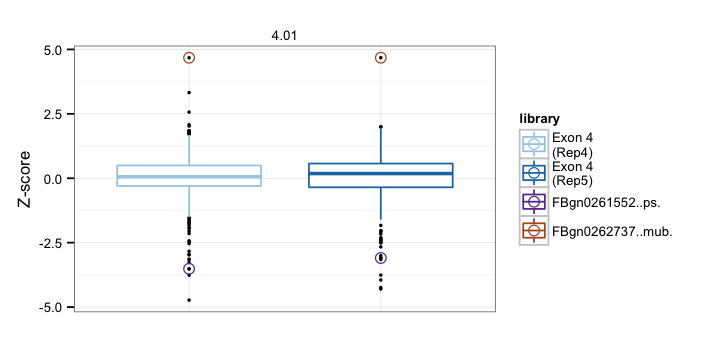

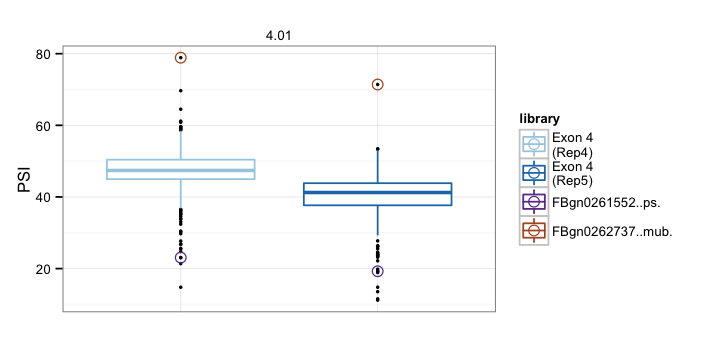

In [9]:
# Z-score plot
data <- unique(subset(all, select = c("RNAi", "exon", "exon_cluster", "z.score", "splice_event", "library")))
ggplot(subset(data, splice_event == "inclusion" & exon == "4.01"), aes(x = library, y = z.score,  color = library)) +
  geom_boxplot(outlier.size = 1) + 
  geom_point(data = subset(data, splice_event == "inclusion" & exon == "4.01" & (RNAi == "FBgn0261552..ps." | RNAi == "FBgn0262737..mub.")),
             aes(x = library, y = z.score,  color = RNAi), shape = 1, size = 3) +
# geom_point(data = subset(data, splice_event == "inclusion" & exon == "4.01" & (RNAi == "FBgn0261552..ps." | RNAi == "FBgn0262737..mub." | RNAi == "FBgn0011666..msi.")), aes(x = library, y = z.score,  color = RNAi), shape = 1) +
  facet_grid(. ~ exon, space = "free", scale = "free") + 
  scale_color_manual(values = brewer.pal(12, "Paired")[c(1,2,10,12)]) +
  theme_bw_small() +
  ylab("Z-score") +
  xlab("") + 
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
       )
ggsave("Figures/Figure 3A. Exon 4.1 variant inclusion z-score boxplots and Ps Mub points.pdf", height = 3.5, width = 3) 

# PSI plot
data <- unique(subset(all, select = c("RNAi", "exon", "exon_cluster", "PSI", "splice_event", "library")))
ggplot(subset(data, splice_event == "inclusion" & exon == "4.01"), aes(x = library, y = PSI,  color = library)) +
  geom_boxplot(outlier.size = 1) + 
  geom_point(data = subset(data, splice_event == "inclusion" & exon == "4.01" & (RNAi == "FBgn0261552..ps." | RNAi == "FBgn0262737..mub.")),
             aes(x = library, y = PSI,  color = RNAi), shape = 1, size = 3) +
# geom_point(data = subset(data, splice_event == "inclusion" & exon == "4.01" & (RNAi == "FBgn0261552..ps." | RNAi == "FBgn0262737..mub." | RNAi == "FBgn0011666..msi.")), aes(x = library, y = z.score,  color = RNAi), shape = 1) +
  facet_grid(. ~ exon, space = "free", scale = "free") + 
  scale_color_manual(values = brewer.pal(12, "Paired")[c(1,2,10,12)]) +
  theme_bw_small() +
  ylab("PSI") +
  xlab("") + 
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
       )
ggsave("Figures/Figure 3A. Exon 4.1 variant inclusion PSI boxplots and Ps Mub points.pdf", height = 3.5, width = 3) 

ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead
ymax not defined: adjusting position using y instead


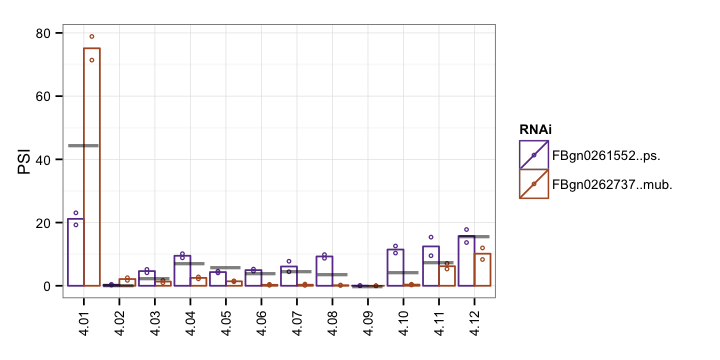

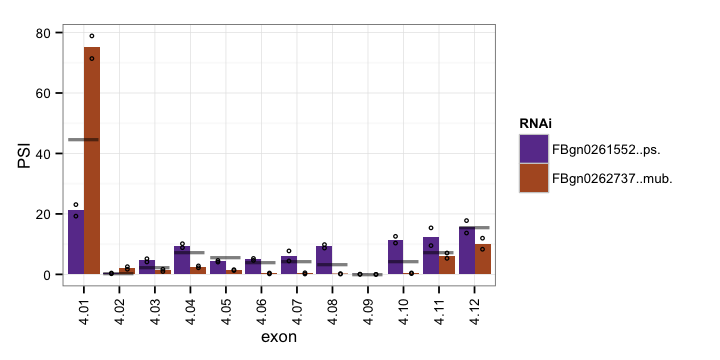

In [10]:
data <- unique(subset(all, select = c("RNAi", "exon", "exon_cluster", "PSI", "PSI.median", "z.score", "splice_event", "library")))
data <- subset(data, splice_event == "inclusion" & exon_cluster == 4 & (RNAi == "FBgn0261552..ps." | RNAi == "FBgn0262737..mub."))
ggplot(data, aes(x = exon, y = PSI)) +
  stat_summary(aes(color = RNAi), fun.y = mean, geom = "bar", position = "dodge", fill = "transparent") +
  geom_point(aes(color = RNAi), position = position_dodge(width = 0.9), shape = 1, size = 1) +
  stat_summary(data = subset(data, select = c("exon", "PSI.median")), aes(x = exon, y = PSI.median), fun.y = mean, geom = "point", shape = 95, size = 11, alpha = 0.5) +
  scale_color_manual(values = brewer.pal(12, "Paired")[c(10,12)]) +
  theme_bw_small() + 
  theme(axis.title.x = element_blank())
ggsave("Figures/Figure 3B. Exon 4 variant inclusion PSI bargraph and Ps Mub points.pdf", height = 3, width = 5)

data <- unique(subset(all, select = c("RNAi", "exon", "exon_cluster", "PSI", "PSI.median", "z.score", "splice_event", "library")))
data <- subset(data, splice_event == "inclusion" & exon_cluster == 4 & (RNAi == "FBgn0261552..ps." | RNAi == "FBgn0262737..mub."))
ggplot(data, aes(x = exon, y = PSI)) +
  stat_summary(aes(fill = RNAi), fun.y = mean, geom = "bar", position = "dodge") +
  geom_point(aes(group = RNAi), position = position_dodge(width = 0.9), shape = 1, size = 1, color = "black") +
  stat_summary(data = subset(data, select = c("exon", "PSI.median")), aes(x = exon, y = PSI.median), fun.y = mean, geom = "point", shape = 95, size = 11, alpha = 0.5) +
  scale_fill_manual(values = brewer.pal(12, "Paired")[c(10,12)]) +
  theme_bw_small()

# Figure 3.

<img src="images/Figure%203.png"/>